# Figures for Scintillating and Hermann Grid dynamics

This notebook contains the code for parsing, analyzing, and visualizing the experimental data from human participants.
- Input is a CSV file of participant (rows) with illusion effect for parameter interval (columns)
- First row are the interval labels
- Output are figure plots

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from operator import add

In [2]:
def Grapher (filename, filename_bin='none', title='none', xtitle='none', 
             critical_point='none', function='none', scale=1, scale2=1, dis_val=0.15):
    
    # Reading file
    imported_file = np.genfromtxt('Data/'+filename+".csv", delimiter=',')
    
    # Averaging over participants
    mean_data = np.mean(imported_file[1:], axis=0)
    
    # Calculating stats: sample size, standard deviation
    std = np.std(imported_file[1:], axis=0)
    sample_size = np.size(imported_file[1:], 0)
    
    # Converting to python lists
    labels = imported_file[0].tolist()
    mean_data = mean_data.tolist()
    std = std.tolist()
    
    # if plotting perception as well
    if filename_bin is not 'none':
        imported_file2 = np.genfromtxt('Data/'+filename_bin+".csv", delimiter=',')
        mean_data2 = np.mean(imported_file2[1:], axis=0)
        
    # if plotting fit as well
    if function is 'quadratic_dec' and critical_point is not 'none':
        a=[]
        b=[]

        for x in np.arange(labels[0],critical_point[0],0.005):
            try:
                y=(scale*(critical_point[0]-x))**0.5
                a.append(x)
                b.append(y)
            except:
                continue
        
        a.append(critical_point[0])
        b.append(0)
        pl.plot(a, b, 'r--', alpha=0.5, label='fitted model')
    
    elif function is 'quadratic_dis' and critical_point is not 'none':
        a=[]
        b=[]

        for x in np.arange(labels[0],critical_point[0],0.005):
            if x <= dis_val:
                try:
                    y=(scale*(critical_point[0]-x))**0.5
                    a.append(x)
                    b.append(y)
                except:
                    continue
            else:
                a.append(x)
                b.append(0)
        
        a.append(critical_point[0])
        b.append(0)
        pl.plot(a, b, 'r--', alpha=0.5, label='fitted model')
        
    
    elif function is 'double' and critical_point is not 'none':
        a=[]
        b=[]
        for x in np.arange(labels[0],critical_point[0],0.005):
            try:    
                y=(scale*(critical_point[0]-x))**0.5
                a.append(x)
                b.append(y)
            except:
                continue
        a.append(critical_point[0])
        b.append(0)
        pl.plot(a, b, 'r--', alpha=0.5, label='fitted model')
        zero_range = np.arange(critical_point[0],critical_point[1],0.005)
        pl.plot(zero_range, np.zeros(len(zero_range)), 'r--', alpha=0.5)
        c=[critical_point[1]]
        d=[0]
        for x in np.arange(critical_point[1],labels[-1],0.005):
            try:
                y=(scale2*(x-critical_point[1]))**0.5
                c.append(x)
                d.append(y)
            except:
                continue
        pl.plot(c, d, 'r--', alpha=0.5)

    # Plotting figure with means
    pl.errorbar(labels, mean_data, yerr=std, ecolor='gray', label='illusion')
#    pl.fill_between(labels, mean_data-std, mean_data+std,facecolor='b',alpha=0.5)
    if filename_bin is not 'none':
        pl.plot(labels, mean_data2, ':', label='perception')
    pl.annotate('Sample Size: '+str(sample_size), xy=(0.75, 0.7), xycoords='axes fraction')
    if title is not "none":
        pl.title(title, fontsize=14)
    if xtitle is not "none":
        pl.xlabel(xtitle, fontsize=14)
    if critical_point is not "none":
        crit_idxs = []
        i=0
        for crit_pt in critical_point:
            crit_idx = labels.index(round(critical_point[i],2))
            crit_idxs.append(crit_idx)
            if i < 1:
                pl.plot(crit_pt, mean_data[crit_idx], 'ro', label='critical point')
            else:
                pl.plot(crit_pt, mean_data[crit_idx], 'ro')
            i += 1
    pl.ylim([-0.05, 1.05])
    pl.xlim([min(labels), max(labels)])
    pl.legend(numpoints=1, prop={'size': 8})
    pl.ylabel('Illusion Magnitude', fontsize=14)
    pl.tick_params(axis='both', which='major', labelsize=12)
    pl.tick_params(axis='both', which='minor', labelsize=12)
    pl.tight_layout()
    pl.savefig("./Figures/"+filename, dpi=700)
    pl.show()

In [3]:
def OptimizedGrapher (filename, filename_bin='none', title='none', xtitle='none', min_x=0, max_x=1):
    
    # Reading file
    imported_file = np.genfromtxt('Data/'+filename+".csv", delimiter=',')
    
    # Averaging over participants
    mean_data = np.mean(imported_file[1:], axis=0)
    
    # Calculating stats: sample size, standard deviation
    std = np.std(imported_file[1:], axis=0)
    sample_size = np.size(imported_file[1:], 0)
    
    # Converting to python lists
    labels = imported_file[0].tolist()
    mean_data = mean_data.tolist()
    std = std.tolist()
    
    # if plotting perception as well
    if filename_bin is not 'none':
        imported_file2 = np.genfromtxt('Data/'+filename_bin+".csv", delimiter=',')
        mean_data2 = np.mean(imported_file2[1:], axis=0)
    
    # Optimal fitting of data
    crit_idxs=[]
    crit_idxs.append(np.sort(np.where(mean_data2 <= 0.5)[0])[0])
    
    nonz_idx = np.where(np.array(mean_data) == 0.0)[0][0]
    nonz_data = mean_data[:nonz_idx+1]
    x = np.linspace(min_x,max_x,len(mean_data))
    x = x[:nonz_idx+1]
    powers = [0.5, 1, 2] # square-root to quadratic
    scale_range = np.linspace(0.1,10,50)
    best_scale = 0
    best_power = 0
    min_error = 100
    for scale in scale_range:
        for power in powers:
            y=(scale*(x[-1]-x))**power
            error = np.mean(np.abs(nonz_data-y))
            if error < min_error:
                best_scale = scale
                best_power = power
                min_error = error

    y = (best_scale*(x[-1]-x))**best_power
    pl.plot(x, y, 'm--', alpha=0.5, linewidth=2.0, label='Fitted model')

    print ('Optimized parameters:')
    print ('Scale = '+str(best_scale))
    print ('Power = '+str(best_power)) 
    print ('Error = '+str(min_error))
    

    # Plotting figure with means
    pl.errorbar(labels, mean_data, yerr=std, ecolor='gray', linewidth=1.5, label='Illusion magnitude')
    if filename_bin is not 'none':
        pl.plot(labels, mean_data2, ':', linewidth=2.0, label='Fraction w/ perception')
    pl.annotate('n = '+str(sample_size), xy=(0.8, 0.6), fontsize=12, xycoords='axes fraction')
    if title is not "none":
        pl.title(title, fontsize=14)
    if xtitle is not "none":
        pl.xlabel(xtitle, fontsize=14)
    
    x = np.linspace(min_x,max_x,len(mean_data))
    for i, crit_idx in enumerate(crit_idxs):
        if i == 0:
            pl.plot(x[crit_idx], mean_data2[crit_idx], 'ro', label='Critical point')
        else:
            pl.plot(x[crit_idx-1], mean_data[crit_idx-1], 'ro')
    pl.ylim([-0.05, 1.05])
    pl.xlim([min(labels), max(labels)])
    pl.legend(numpoints=1, fontsize=10)
    pl.tick_params(axis='both', which='major', labelsize=12)
    pl.tick_params(axis='both', which='minor', labelsize=12)
    pl.tight_layout()
    pl.savefig("./Figures/"+filename, dpi=700)
    pl.show()

In [4]:
def graphTwoParam (file_list, exp_list, title='none', xtitle='none', critical_point='none'):
    
    mean_datas = []
    labels_list = []
    std_list = []
    
    for filename in file_list:
        imported_file = np.genfromtxt('Data/'+filename+".csv", delimiter=',')
        mean_data = np.mean(imported_file[1:], axis=0)
        std = np.std(imported_file[1:], axis=0)
        sample_size = np.size(imported_file[1:], 0)
        labels = imported_file[0].tolist()
        mean_data = mean_data.tolist()
        std = std.tolist()
        # Appending...
        mean_datas.append(mean_data)
        labels_list.append(labels)
        std_list.append(std)
    
    # Plotting
    i = 0
    for datas in mean_datas:
        pl.errorbar(labels_list[i], datas, yerr=std_list[i], ecolor='gray', linewidth=1.5, label=exp_list[i])
        #if critical_point is not "none":
        #    crit_idx = labels.index(critical_point[i])
        #    if i == 0:
        #        pl.plot(critical_point[i], datas[crit_idx], 'ro', label='critical point')
        #    else:
        #        pl.plot(critical_point[i], datas[crit_idx], 'ro')
        i += 1
    
    pl.annotate('n = '+str(sample_size), xy=(0.8, 0.55), fontsize=12, xycoords='axes fraction')
    #pl.ylim([-0.05, 1.05])
    pl.legend(numpoints=1, fontsize=12)
    #pl.title('Dot element: dual parameter')
    pl.ylabel('Illusion Magnitude', fontsize=14)
    pl.xlabel(r'Dot whiteness decrease ($1-\gamma$)', fontsize=14)
    filename='twoparam'
    pl.ylim([-0.05, 1.05])
    pl.xlim([min(labels), max(labels)])
    pl.legend(numpoints=1, fontsize=12)
    pl.tick_params(axis='both', which='major', labelsize=12)
    pl.tick_params(axis='both', which='minor', labelsize=12)
    pl.tight_layout()
    pl.savefig("./Figures/"+filename, dpi=700)
    pl.show()

In [5]:
def plotIndividuals (filename, title='none', xtitle='none'):
    
    # Reading file
    imported_file = np.genfromtxt('Data/'+filename+".csv", delimiter=',')
    labels = imported_file[0].tolist()
    
    # Averaging over participants
    mean_data = np.mean(imported_file[1:], axis=0)
    
    plot_colors = ['r', 'b', 'g', 'c', 'k', 'y', 'm', 'r']
    
    for i, participant in enumerate(imported_file[1:]):
        pl.plot(labels, participant, plot_colors[i])
    
    if title != 'none':
        pl.title(title)
    if xtitle != 'none':
        pl.xlabel(xtitle)
    pl.ylim([-0.05, 1.05])
    pl.xlim([min(labels), max(labels)])
    pl.ylabel('Illusion Magnitude/Radius')
    pl.savefig("./Figures/"+filename+'_all', dpi=500)
    pl.show()

### Part I: Dot Blackness

Optimized parameters:
Scale = 1.9183673469387756
Power = 1
Error = 0.06361852433281014


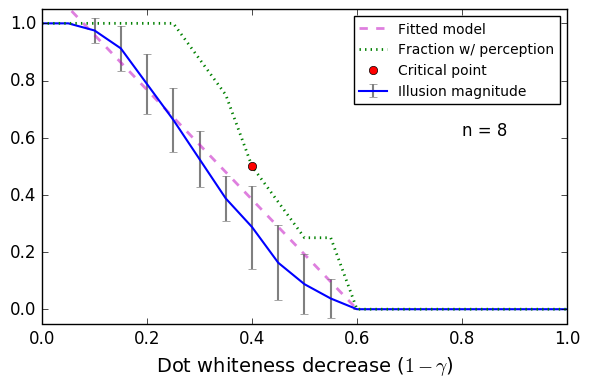

In [204]:
OptimizedGrapher("dot_blackness", "dot_blackness_bin", title='none', xtitle = r'Dot whiteness decrease ($1-\gamma$)')

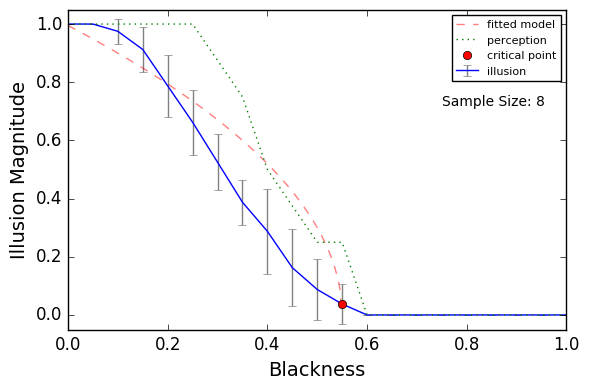

In [163]:
# OLD
Grapher("dot_blackness", "dot_blackness_bin", title='none', xtitle = 'Blackness', 
        critical_point=[0.55], function='quadratic_dec', scale=1.8)

### Part II: Dot Radius

Optimized parameters:
Scale = 1.1102040816326533
Power = 1
Error = 0.04783673469387749


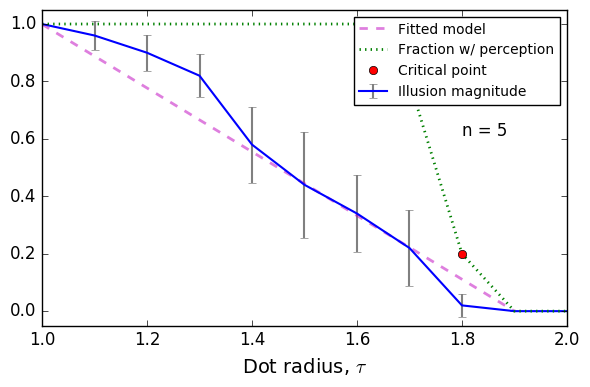

In [6]:
OptimizedGrapher("dot_radius", "dot_radius_bin", title='none', xtitle = r'Dot radius, $\tau$', min_x=1, max_x=2)

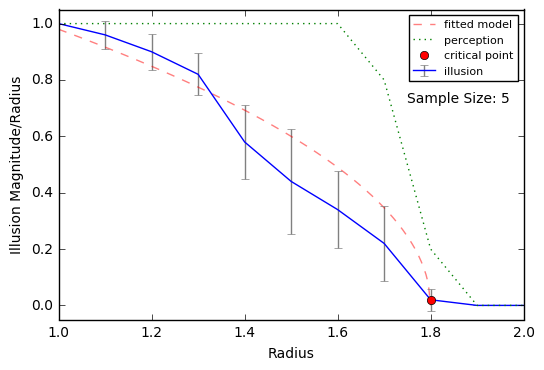

In [7]:
#Grapher("dot_radius", "dot_radius_bin", title='none', xtitle = 'Radius', 
#        critical_point=[1.8], function='quadratic_dis', scale=1.2, dis_val=1.7)
Grapher("dot_radius", "dot_radius_bin", title='none', xtitle = 'Radius', 
        critical_point=[1.8], function='quadratic_dec', scale=1.2)

### Part III: Line Blackness

Optimized parameters:
Scale = 1.1102040816326533
Power = 0.5
Error = 0.06607120194635553


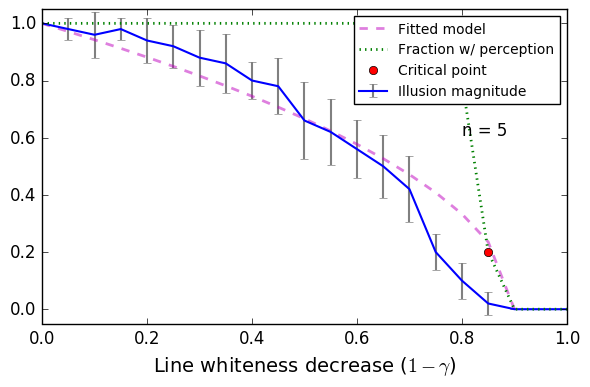

In [7]:
OptimizedGrapher("line_blackness", "line_blackness_bin", title='none', xtitle = r'Line whiteness decrease ($1-\gamma$)')

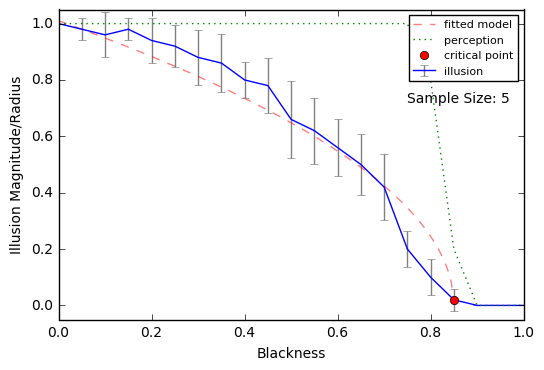

In [8]:
#Grapher("line_blackness", "line_blackness_bin", title='none', xtitle = 'Blackness', 
#        critical_point=[0.85], function='quadratic_dis', scale=1.2, dis_val=0.75)
Grapher("line_blackness", "line_blackness_bin", title='none', xtitle = 'Blackness', 
        critical_point=[0.85], function='quadratic_dec', scale=1.2)

### Part IV: Background Blackness

Optimized parameters:
Scale = 1.9183673469387756
Power = 1
Error = 0.07295918367346942


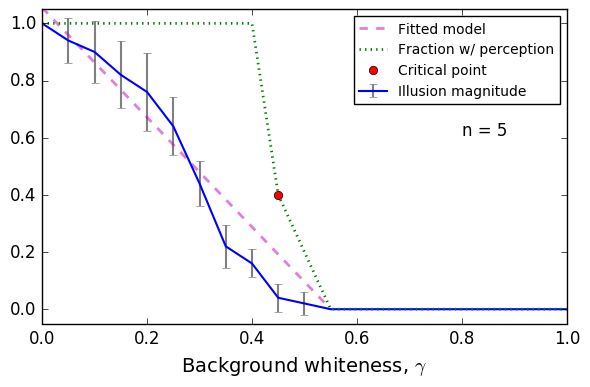

In [10]:
OptimizedGrapher("bg_blackness", "bg_blackness_bin", title='none', xtitle = r'Background whiteness, $\gamma$')

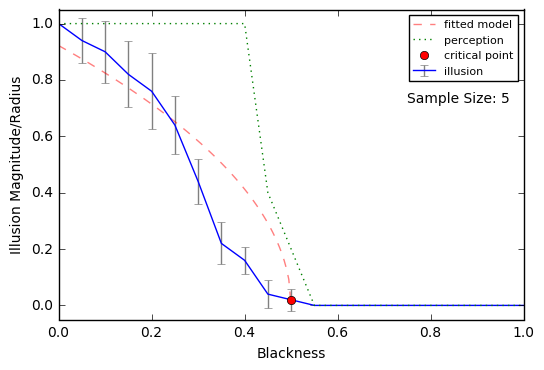

In [18]:
Grapher("bg_blackness", "bg_blackness_bin", title='none', xtitle = 'Blackness', 
        critical_point=[0.50], function='quadratic_dec', scale=1.7)

### Part V: Hermann Grid

Optimized parameters:
Scale = 1.1102040816326533
Power = 1
Error = 0.05638699924414203


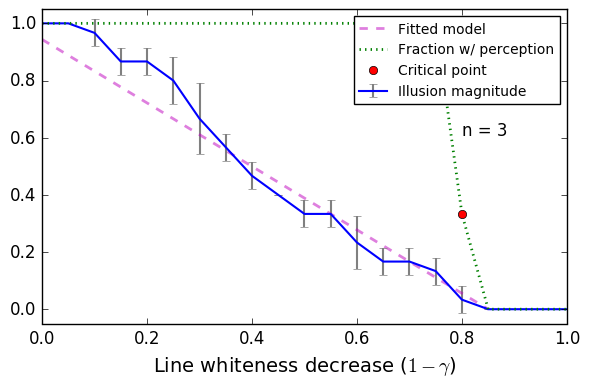

In [9]:
OptimizedGrapher("HG", "HG_bin", title='none', xtitle = r'Line whiteness decrease ($1-\gamma$)')

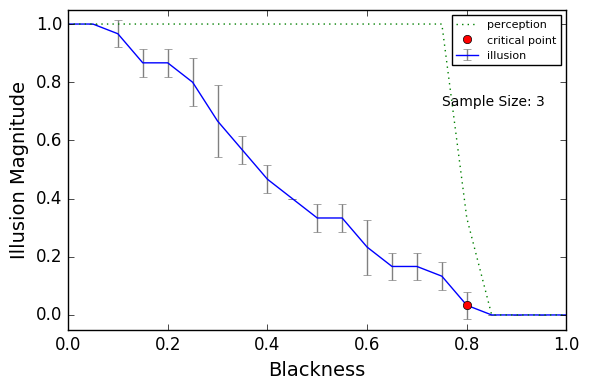

In [169]:
Grapher("HG", "HG_bin", title='none', xtitle = 'Blackness', critical_point=[0.80])

Optimized parameters:
Scale = 2.322448979591837
Power = 1
Error = 0.02806122448979593


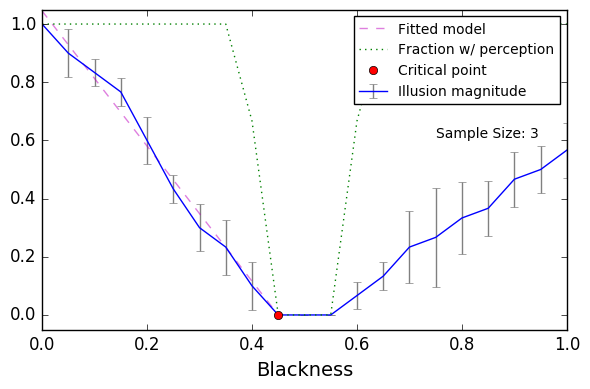

In [171]:
OptimizedGrapher("HG_bg", "HG_bg_bin", title='none', xtitle = 'Blackness')

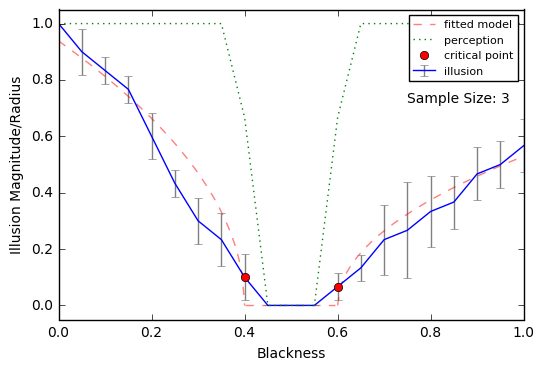

In [11]:
Grapher("HG_bg", "HG_bg_bin", title='none', xtitle = 'Blackness', 
        critical_point=[0.4, 0.6], function='double', scale=2.2, scale2=0.7)

### Two Parameter

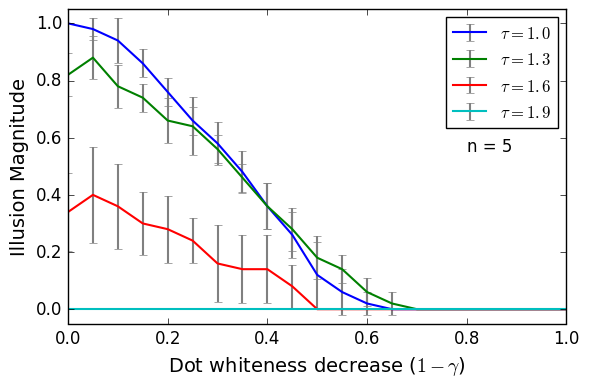

In [217]:
graphTwoParam(['2pm_10', '2pm_13', '2pm_16', '2pm_19'], 
              [r'$\tau=1.0$', r'$\tau=1.3$', r'$\tau=1.6$', r'$\tau=1.9$'], 
              critical_point=[0.60, 0.65, 0.45, 0])

### Individual trajectories are square-root-like

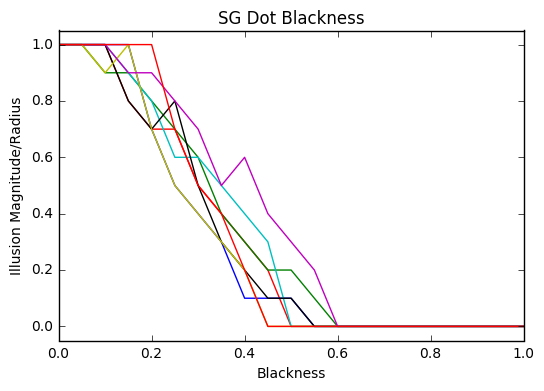

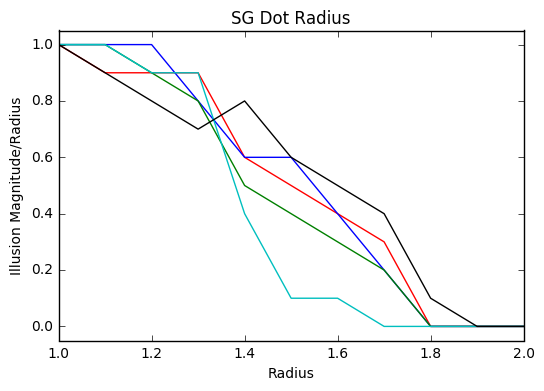

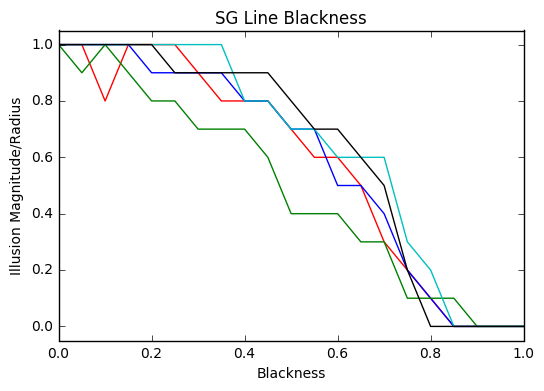

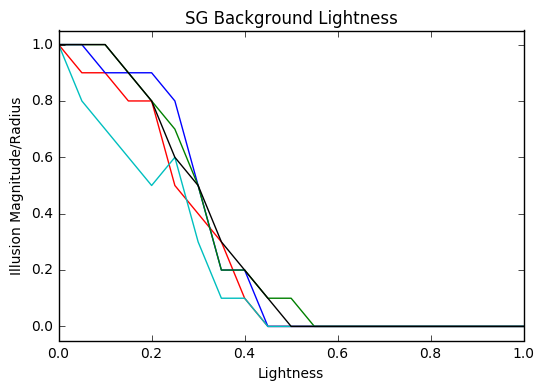

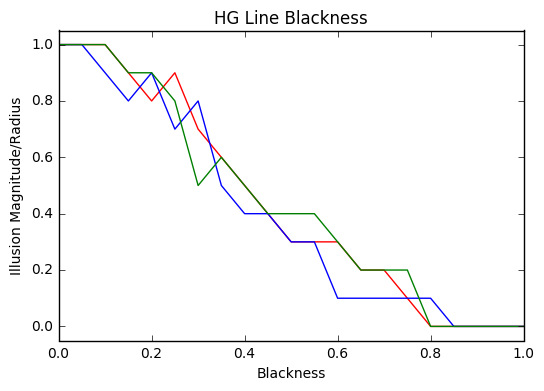

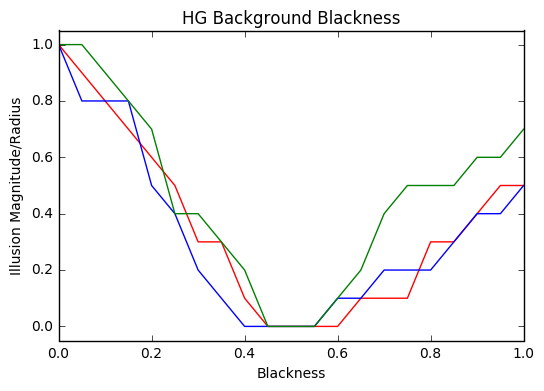

In [13]:
plotIndividuals ('dot_blackness', title='SG Dot Blackness', xtitle='Blackness')
plotIndividuals ('dot_radius', title='SG Dot Radius', xtitle='Radius')
plotIndividuals ('line_blackness', title='SG Line Blackness', xtitle='Blackness')
plotIndividuals ('bg_blackness', title='SG Background Lightness', xtitle='Lightness')
plotIndividuals ('HG', title='HG Line Blackness', xtitle='Blackness')
plotIndividuals ('HG_bg', title='HG Background Blackness', xtitle='Blackness')